In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import math
import vmd_contact

font = {'size': 16}
matplotlib.rc('font', **font)
import mdtraj as md

In [2]:
os.chdir('/home/bxie/PycharmProjects/KDEL/kdel_simulation/trajectories')

In [3]:
peptides = ['aekdel','taekdel']
peptide_residues = ['ASP5', 'GLU6']

receptor_chain_ID = 'A'
stride = 1
rec_resids = [169]
lig_resids = [5,6]

In [4]:
def extract_specific_dihedral_1(ref_pdb,traj_dcd):
    residues_list = []
    ref_structure = md.load(ref_pdb)
    trajectory = md.load(traj_dcd,top = ref_structure,stride=1)#atom_indices = atom_indexes,
    trajectory.superpose(trajectory, frame = 0)
    indices_1, angles_chi1 = md.compute_chi1(trajectory)
    for indice in indices_1:
        residues_list.append(str(ref_structure.topology.atom(indice[0])).split('-')[0])
    data ={}
    for res in residues_list:
        data[res] = []
    total_angle_length = angles_chi1.shape[0]
    total_residue_length = len(residues_list)
    for a in range(total_angle_length):
        for i in range(total_residue_length):
            res = residues_list[i]
            data[res].append(angles_chi1[a][i])
    return data

def angle_unit_2(angles):
    convert_angles=[]
    for a in angles:
        a_deg = math.degrees(float(a))
        convert_angles.append(a_deg)
    return convert_angles

def wrapper(top_pdb, traj_dcd, ligand_chain_ID, receptor_resids,lig_resids):
    step = vmd_contact.Distance(top_pdb, receptor_chain_ID, ligand_chain_ID, traj_dcd, stride,receptor_resids,lig_resids)
    distance_matrix,receptor_labels,ligand_labels = step.contact_dist_vmd_heavy()
    return distance_matrix,receptor_labels,ligand_labels
def rewrite_ligand_labels(ligand_labels):
    new_labels = []
    for l in ligand_labels:
        new_labels.append("%3d"%(0-int(l.split()[0]))+' '+l.split()[1])
    return new_labels


In [5]:
#distance_xlabels = {}
#distance_ylabels = {}
distance_data3D = {}
distance_data2E = {}
angles_data3D = {}
angles_data2E = {}

for pep in peptides:
    if pep =='aekdel':
        pdb_file = 'KDEL_'+pep+'_restrain_Resi4.pdb' 
        traj_file = 'KDEL_xtal_restrain.dcd'
        lig_chain_ID = 'B'
        distance_matrix,receptor_labels,ligand_labels = wrapper(pdb_file, traj_file, lig_chain_ID, rec_resids,lig_resids)
        a_angles = extract_specific_dihedral_1(pdb_file,traj_file)
        angles_data3D[pep] = angle_unit_2(a_angles['ASP5'])
        angles_data2E[pep] = angle_unit_2(a_angles['GLU6'])
        distance_data3D[pep] = distance_matrix[:,0,0]
        distance_data2E[pep] = distance_matrix[:,0,1]
        
        #distance_xlabels[pep] = receptor_labels
        #distance_ylabels[pep] = ligand_labels
        
        traj_file = 'KDEL_xtal_restrain_rep1.dcd'
        distance_matrix,receptor_labels,ligand_labels = wrapper(pdb_file, traj_file, lig_chain_ID, rec_resids,lig_resids)
        a_angles = extract_specific_dihedral_1(pdb_file,traj_file)
        angles_data3D[pep+'_rep1'] = angle_unit_2(a_angles['ASP5'])
        angles_data2E[pep+'_rep1'] = angle_unit_2(a_angles['GLU6'])
        distance_data3D[pep+'_rep1'] = distance_matrix[:,0,0]
        distance_data2E[pep+'_rep1'] = distance_matrix[:,0,1]        
        #distance_xlabels[pep+'_rep1'] = receptor_labels
        #distance_ylabels[pep+'_rep1'] = ligand_labels
        
        traj_file = 'KDEL_xtal_restrain_rep2.dcd'
        distance_matrix,receptor_labels,ligand_labels = wrapper(pdb_file, traj_file, lig_chain_ID, rec_resids,lig_resids)
        a_angles = extract_specific_dihedral_1(pdb_file,traj_file)
        angles_data3D[pep+'_rep2'] = angle_unit_2(a_angles['ASP5'])
        angles_data2E[pep+'_rep2'] = angle_unit_2(a_angles['GLU6'])
        distance_data3D[pep+'_rep2'] = distance_matrix[:,0,0]
        distance_data2E[pep+'_rep2'] = distance_matrix[:,0,1]        
        #distance_xlabels[pep+'_rep2'] = receptor_labels
        #distance_ylabels[pep+'_rep2'] = ligand_labels
    else:
        pdb_file = 'KDEL_'+pep+'_restrain_Resi4.pdb' 
        traj_file = os.path.join('/home/bxie/PycharmProjects/KDEL/kdel_simulation/TAEKDEL_new/TAEKDEL_new.dcd')
        distance_matrix,receptor_labels,ligand_labels = wrapper(pdb_file, traj_file, lig_chain_ID, rec_resids,lig_resids)
        a_angles = extract_specific_dihedral_1(pdb_file,traj_file)
        #distance_xlabels[pep] = receptor_labels
        #distance_ylabels[pep] = ligand_labels 
        angles_data3D[pep] = angle_unit_2(a_angles['ASP5'])
        angles_data2E[pep] = angle_unit_2(a_angles['GLU6'])
        distance_data3D[pep] = distance_matrix[:,0,0]
        distance_data2E[pep] = distance_matrix[:,0,1]
#print (distance_data)



  0%|          | 0/1 [00:00<?, ?it/s]

range 169 to 169 residues are used for calculating contact frequency.


100%|██████████| 1/1 [00:15<00:00, 15.26s/it]
/home/bxie/Installers/anaconda3-5.2.0/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbstructure.py:435: UserWarning: WARNING: two consecutive residues with same number (ATOM   3433  H   NMA A 207     -10.203   3.715 -19.719  0.00  0.00      C2   H  , ATOM   3432  HZ3 LYS A 207      -8.593   5.086 -25.666  0.00  0.00      C2   H  )
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (atom, self._current_residue.atoms[-1]))
/home/bxie/Installers/anaconda3-5.2.0/lib/python3.8/site-packages/mdtraj/geometry/dihedral.py:374: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  indices = np.vstack(x for x in indices if x.size)[id_sort]
  0%|          | 0/1 [00:00<?, ?it/s]

range 169 to 169 residues are used for calculating contact frequency.


  0%|          | 0/1 [00:00<?, ?it/s]

range 169 to 169 residues are used for calculating contact frequency.


  0%|          | 0/1 [00:00<?, ?it/s]

range 169 to 169 residues are used for calculating contact frequency.


100%|██████████| 1/1 [00:15<00:00, 15.59s/it]
/home/bxie/Installers/anaconda3-5.2.0/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbstructure.py:435: UserWarning: WARNING: two consecutive residues with same number (ATOM   3547  H   NMA A 207     -11.767   6.100 -18.705  0.00  0.00      C3   H  , ATOM   3546  HZ3 LYS A 207      -5.841  11.941 -20.887  0.00  0.00      C3   H  )
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (atom, self._current_residue.atoms[-1]))


In [6]:
chi1_R169_3D = []
chi1_R169_2E = []
dist_R169_3D = []
dist_R169_2E = []
for key in angles_data3D.keys():
    chi1_R169_3D += angles_data3D[key]
    chi1_R169_2E += angles_data2E[key]
    dist_R169_3D += list(distance_data3D[key])
    dist_R169_2E += list(distance_data2E[key])
    for n_frame in range(len(angles_data3D[key])):
        if angles_data3D[key][n_frame] < -50 and distance_data3D[key][n_frame] <3: 
            print(key, n_frame)
        
assert len(chi1_R169_3D) == len(dist_R169_2E)
booted_index = []
for _ in range(100):
    random_number = np.random.choice(len(chi1_R169_3D), len(chi1_R169_3D))
    for r in random_number:
        booted_index.append(r)
booted_chi1_R169_3D = [chi1_R169_3D[b] for b in booted_index]
booted_chi1_R169_2E = [chi1_R169_2E[b] for b in booted_index]
booted_dist_R169_3D = [dist_R169_3D[b] for b in booted_index]
booted_dist_R169_2E = [dist_R169_2E[b] for b in booted_index]

aekdel 43
aekdel 138
aekdel 206
aekdel 635
aekdel 643
aekdel 684
aekdel 685
aekdel 733
aekdel 988
aekdel 998
aekdel 1104
aekdel 2837
aekdel 4427
aekdel_rep1 4
aekdel_rep1 21
aekdel_rep1 49
aekdel_rep1 71
aekdel_rep1 74
aekdel_rep1 75
aekdel_rep1 76
aekdel_rep1 81
aekdel_rep1 111
aekdel_rep1 137
aekdel_rep1 161
aekdel_rep1 273
aekdel_rep1 278
aekdel_rep1 300
aekdel_rep1 319
aekdel_rep1 324
aekdel_rep1 325
aekdel_rep1 352
aekdel_rep1 360
aekdel_rep1 361
aekdel_rep1 363
aekdel_rep1 384
aekdel_rep1 385
aekdel_rep1 386
aekdel_rep1 388
aekdel_rep1 1680
aekdel_rep1 1700
aekdel_rep1 3899
aekdel_rep2 35
aekdel_rep2 52
aekdel_rep2 210
aekdel_rep2 263
aekdel_rep2 286
aekdel_rep2 804
aekdel_rep2 805
taekdel 24


In [7]:
names = ['R169_vs_-3D', 'R169_vs_-2E']
full_data = {}
full_data['data_name'] = []
full_data['Distance'] = []
full_data['Chi1_angle'] = []

for i in range(len(booted_chi1_R169_3D)):
    full_data['data_name'].append('R169_vs_-3D')
    full_data['Chi1_angle'].append(booted_chi1_R169_3D[i])
    full_data['Distance'].append(booted_dist_R169_3D[i])
    
    full_data['data_name'].append('R169_vs_-2E')
    full_data['Chi1_angle'].append(booted_chi1_R169_2E[i])
    full_data['Distance'].append(booted_dist_R169_2E[i])


In [8]:
df = pd.DataFrame(data = full_data)

<Figure size 432x288 with 0 Axes>

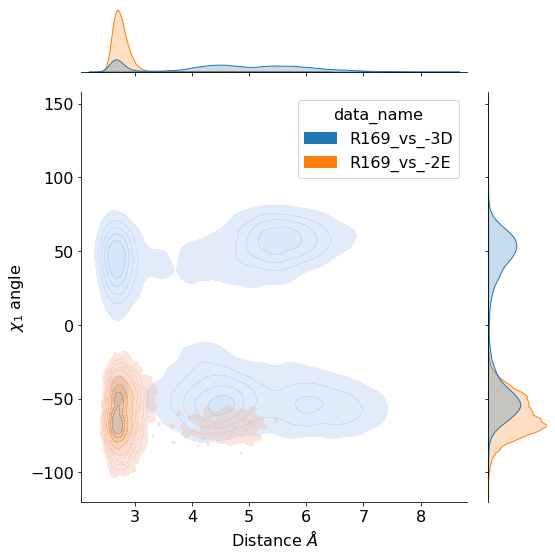

In [9]:
plt.clf()
graph = sns.jointplot(data=df, x = "Distance", y = "Chi1_angle", hue = "data_name",height=8, kind = 'kde',fill=True,alpha=.35)#crest

graph.ax_joint.set_xlabel('Distance $\AA$')
graph.ax_joint.set_ylabel('$\chi_1$ angle')

plt.tight_layout()


Text(0.5, 45.99999999999994, 'Distance $\\AA$')

<Figure size 432x288 with 0 Axes>

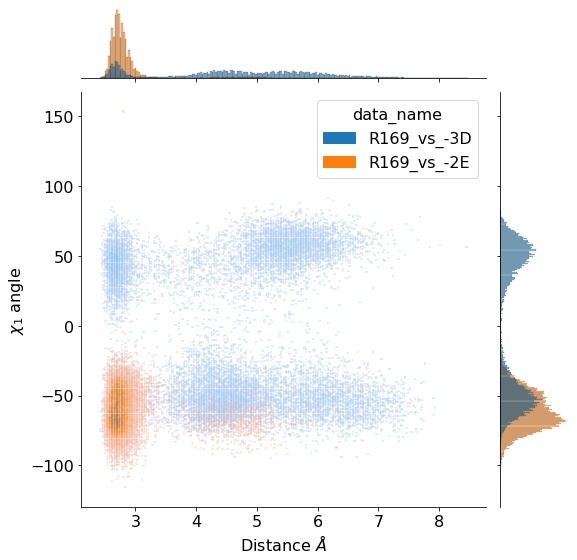

In [10]:
plt.clf()
#print (list(set(df['data_name'])))
sns.jointplot(data=df, x = "Distance", y = "Chi1_angle", hue = "data_name", height = 8, kind = 'hist',alpha=0.3,legend=True)#marginal_kws=dict(bins=500, fill=True)
plt.ylabel('$\chi_1$ angle')
plt.xlabel('Distance $\AA$')